## Dataset Selection
I have selested the sckit-learn library's Breast Cancer Dataset .
This is a dataset for binary classifaction dataset
The goal is to classify a tumor either as Malignant(0) or Benign (1) based on various measurements
Feauters(X) 30 different measurements like radius, texture etc
Target(Y) the diagnosis (0 or 1)

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

#Load the data into a variable called 'data'
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


print("Feature data (X) shape:, X.shape")
print("Target variable (y) shape:, y.shape")
print("\nFirst 5 rows of the feature data:")
print(X.head())
print("\nTagrget names:, data.target_names")



Feature data (X) shape:, X.shape
Target variable (y) shape:, y.shape

First 5 rows of the feature data:
   mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]

Tagrget names:, data.target_names


## 2. Exploratory Data Analyst(EDA)

=== DATASET OVERVIEW ===
Feature data (X) shape: (569, 30)
Target variable (y) shape: (569,)

=== CLASS DISTRIBUTION ===
1    357
0    212
Name: count, dtype: int64

Malignant (0): 212 samples (37.26%)
Benign (1): 357 samples (62.74%)


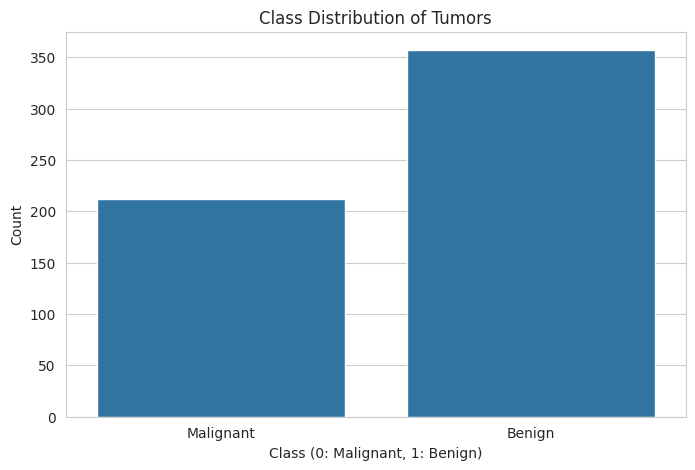

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("=== DATASET OVERVIEW ===")
print("Feature data (X) shape:", X.shape)
print("Target variable (y) shape:", y.shape)

print("\n=== CLASS DISTRIBUTION ===")
class_counts = y.value_counts()
print(class_counts)
print(f"\nMalignant (0): {class_counts[0]} samples ({class_counts[0]/len(y)*100:.2f}%)")
print(f"Benign (1): {class_counts[1]} samples ({class_counts[1]/len(y)*100:.2f}%)")

# Create a bar plot to visualize the class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution of Tumors')
plt.xlabel('Class (0: Malignant, 1: Benign)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.show()


In [ ]:
print ("===MISSING VAUES===")
print("Missing values in each feature:")
print(X.isnull().sum())

print("\n=== FEATURE TYPES ===")
print("Feature data types:")
print(X.dtypes)


===MISSING VAUES===
Missing values in each feature:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

=== FEATURE TYPES ===
Feature data types:
mean radius           

In [ ]:
print("=== DESCRIPTIVE STATISTICS ====")
print(X.describe())

=== DESCRIPTIVE STATISTICS ====
       mean radius  mean texture  ...  worst symmetry  worst fractal dimension
count   569.000000    569.000000  ...      569.000000               569.000000
mean     14.127292     19.289649  ...        0.290076                 0.083946
std       3.524049      4.301036  ...        0.061867                 0.018061
min       6.981000      9.710000  ...        0.156500                 0.055040
25%      11.700000     16.170000  ...        0.250400                 0.071460
50%      13.370000     18.840000  ...        0.282200                 0.080040
75%      15.780000     21.800000  ...        0.317900                 0.092080
max      28.110000     39.280000  ...        0.663800                 0.207500

[8 rows x 30 columns]


=== HISTOGRAMS FOR ALL NUMERICAL FEATURES ===


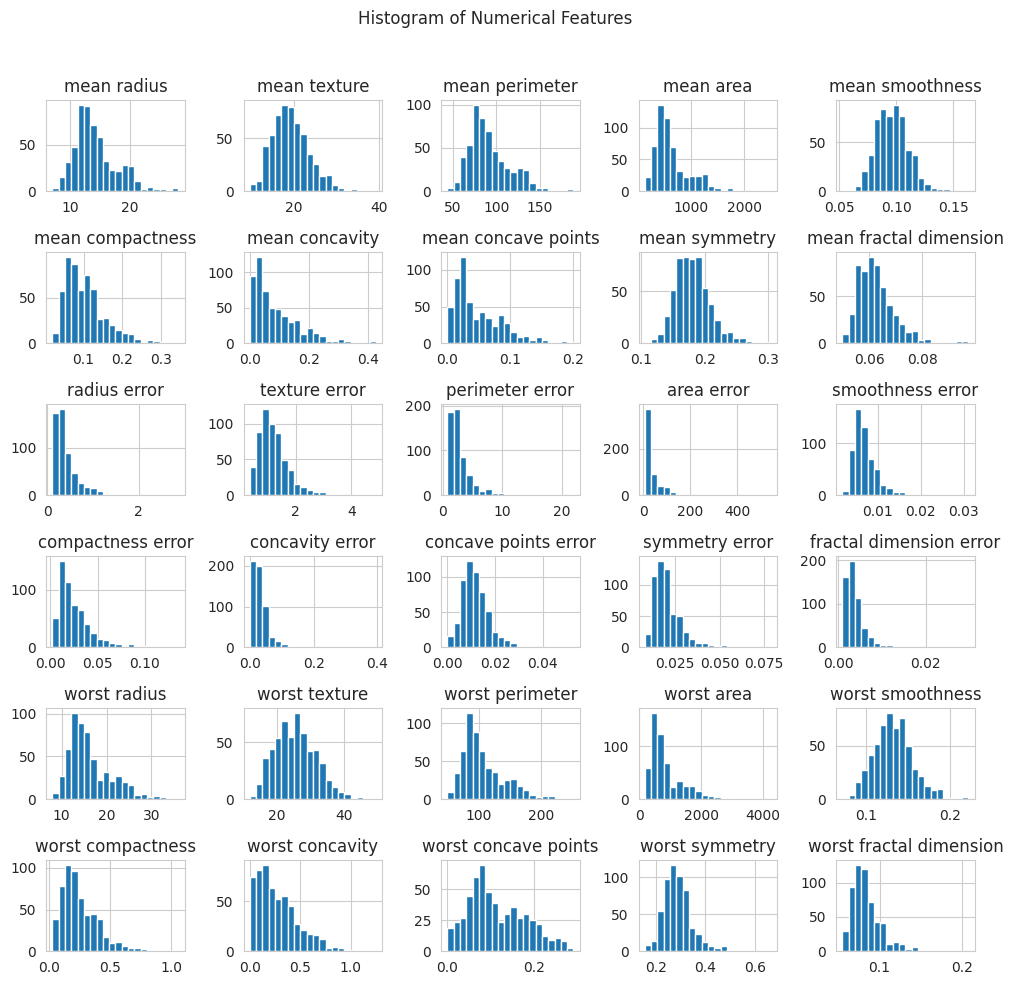

In [ ]:
#HISTOGRAMS FOR ALL NUMERICAL FEATURES
print("=== HISTOGRAMS FOR ALL NUMERICAL FEATURES ===")
X.hist(bins=20 , figsize=(10,10))
plt.suptitle('Histogram of Numerical Features')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

=== CORRELATION MATRIX ===


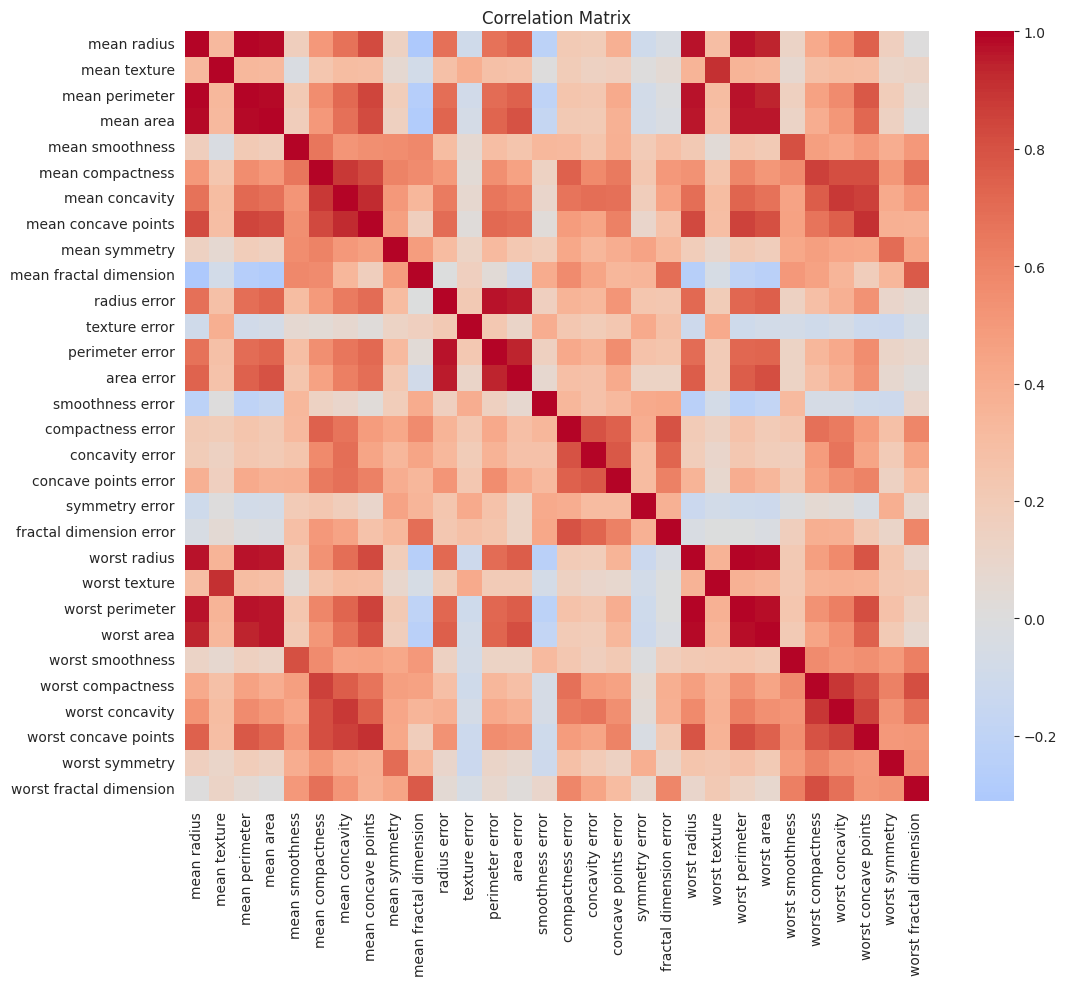


Highly correlated feature pairs (|correlation| > 0.9):
mean radius - mean perimeter: 0.9979
mean radius - mean area: 0.9874
mean radius - worst radius: 0.9695
mean radius - worst perimeter: 0.9651
mean radius - worst area: 0.9411
mean texture - worst texture: 0.9120
mean perimeter - mean area: 0.9865
mean perimeter - worst radius: 0.9695
mean perimeter - worst perimeter: 0.9704
mean perimeter - worst area: 0.9415
mean area - worst radius: 0.9627
mean area - worst perimeter: 0.9591
mean area - worst area: 0.9592
mean concavity - mean concave points: 0.9214
mean concave points - worst concave points: 0.9102
radius error - perimeter error: 0.9728
radius error - area error: 0.9518
perimeter error - area error: 0.9377
worst radius - worst perimeter: 0.9937
worst radius - worst area: 0.9840
worst perimeter - worst area: 0.9776


In [ ]:
print("=== CORRELATION MATRIX ===")
plt.figure(figsize=(12, 10))

correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm',  center=0)
plt.title('Correlation Matrix')
plt.show()

import numpy as np

#finding the highly corre;ateed features
high_corr = np.where(np.abs(correlation_matrix) > 0.9)
high_corr = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y])
             for x, y in zip(*high_corr) if x != y and x < y]
print("\nHighly correlated feature pairs (|correlation| > 0.9):")
for pair in high_corr:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.4f}")


#EDA Insights
The dataset is imbalanced and 62.7% of the tumors are benign and 37.3% are malignant. This means we need to careful using accuracy alone and should alos include precision , recall and F1-score

The descriptive statistics show that features have a very different range meaning the features must be standardized before using models like Logistic Regression

Many features are highly correlated and all have correlation >0.99 meaning there might be redundant information that can be a prroblem for other models


## Data Preposcessing
based on the insights of the EDA:
Handle missing values: No missing values were found , so no action is needed
standardize the features to handle different scales
split the data into training (80%) and testing (20%) sets
standardize the features to handle different scales


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

print("=== PREPROCESSING ===")
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y )


print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))



=== PREPROCESSING ===
Training set shape: (455, 30)
Test set shape: (114, 30)

Class distribution in training set:
1    0.626374
0    0.373626
Name: proportion, dtype: float64

Class distribution in test set:
1    0.631579
0    0.368421
Name: proportion, dtype: float64


MODELING

Three different types of classifiers will be trained:
1. Logistic Regression : A linear model
2. Decision Tree: A non-Linear , tree-based model
3. Random Forest : An ensemble model (many decision trees)

In [ ]:
# Section 4: Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 4.1 Initialize the three models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

# 4.2 & 4.3 Train models and make predictions
results = {}
print("Training models and making predictions...")
for name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)
    # Use the trained model to make predictions on the test data
    y_pred = model.predict(X_test)
    # For ROC Curve later, we need the probability of the positive class (benign)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Store all the results in a dictionary
    results[name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_prob,
    }
    print(f"- {name} done.")

print("\nAll models are trained and evaluated!")

Training models and making predictions...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- Logistic Regression done.
- Decision Tree done.
- Random Forest done.

All models are trained and evaluated!


##Model Evaluation
Each model will be evaluated using
Accuracy , Precision , Recall, F1-score
A confusion Matrix
ROC Curve And AUC (Area Under The Curve)

In [ ]:
# Section 5: Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create a list to store our evaluation metrics
evaluation_data = []

# Calculate metrics for each model
for name, result in results.items():
    y_pred = result['predictions']
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append the results to our list
    evaluation_data.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Convert the list to a DataFrame for a presentab;e table
eval_df = pd.DataFrame(evaluation_data).round(4)
print("Model Evaluation Metrics:")
eval_df

Model Evaluation Metrics:


Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.9649     0.9722  0.9722    0.9722
1        Decision Tree    0.9123     0.9559  0.9028    0.9286
2        Random Forest    0.9561     0.9589  0.9722    0.9655

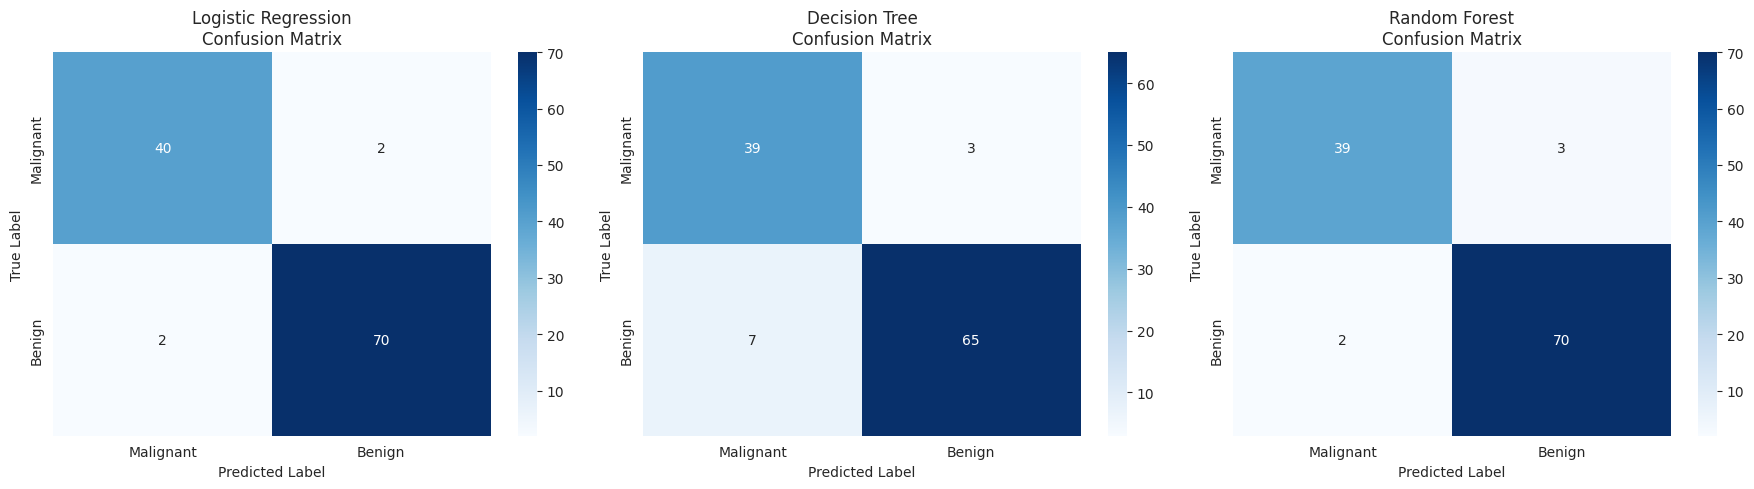

In [ ]:
# Plot Confusion Matrices for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # Create 3 plots side-by-side

# Loop through each model and plot its confusion matrix
for i, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{name}\nConfusion Matrix')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')
    axes[i].set_xticklabels(['Malignant', 'Benign'])
    axes[i].set_yticklabels(['Malignant', 'Benign'])

plt.tight_layout()
plt.show()

In [ ]:
# Plot ROC Curves and calculate AUC for each model
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for name, result in results.items():
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
    roc_auc = auc(fpr, tpr)
    # Plot the ROC curve for each model
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

# Plot the line for a random guess classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.500)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

The model will be evaluated using:
Accuracy , Precision , Recall and F1-score
A confusion matrix
ROC curve and AUC(Area Under the Curve)

MODEL EVALUATION

In [ ]:
# Section 5: Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create a list to store our evaluation metrics
evaluation_data = []

# Calculate metrics for each model
for name, result in results.items():
    y_pred = result['predictions']
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append the results to our list
    evaluation_data.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Convert the list to a DataFrame for a nice table
eval_df = pd.DataFrame(evaluation_data).round(4)
print("Model Evaluation Metrics:")
eval_df

Model Evaluation Metrics:


Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.9649     0.9722  0.9722    0.9722
1        Decision Tree    0.9123     0.9559  0.9028    0.9286
2        Random Forest    0.9561     0.9589  0.9722    0.9655

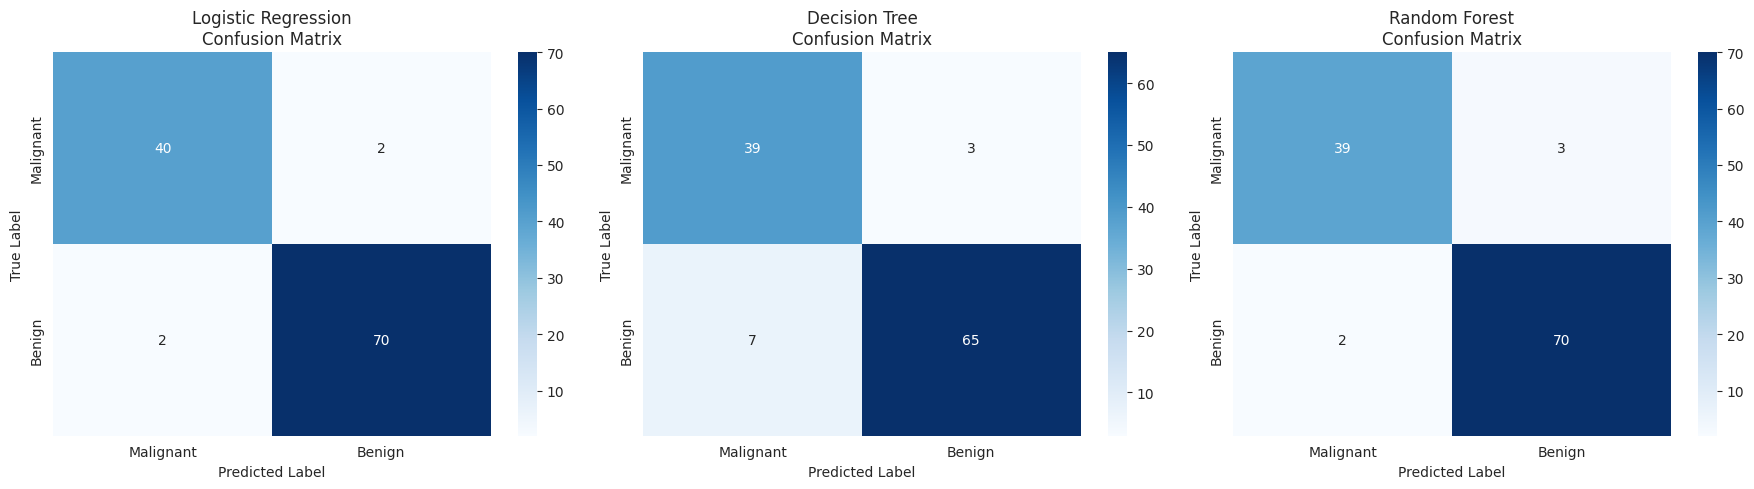

In [ ]:
# Plot Confusion Matrices for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # Create 3 plots side-by-side

# Loop through each model and plot its confusion matrix
for i, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{name}\nConfusion Matrix')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')
    axes[i].set_xticklabels(['Malignant', 'Benign'])
    axes[i].set_yticklabels(['Malignant', 'Benign'])

plt.tight_layout()
plt.show()

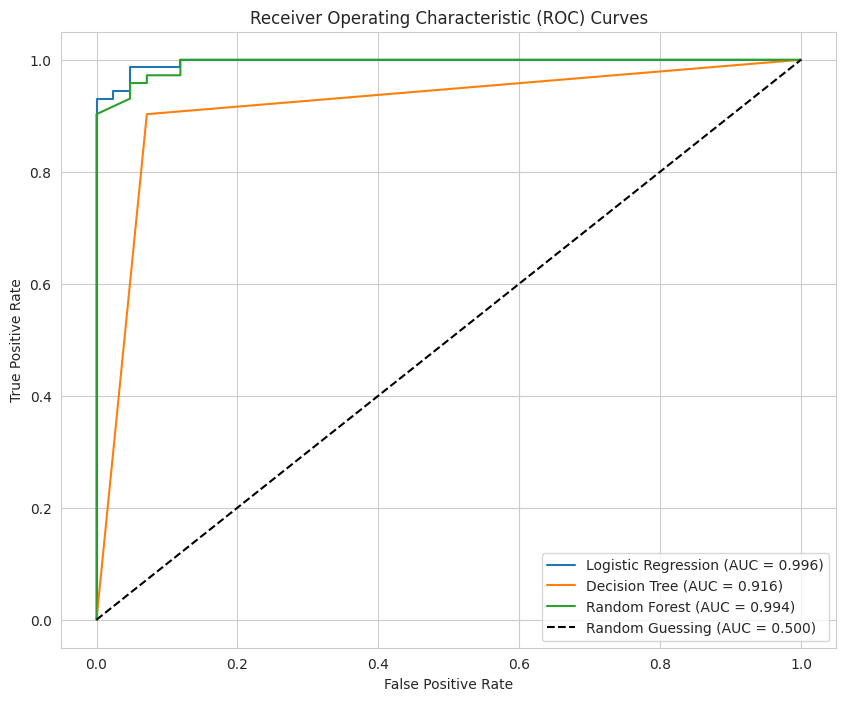

In [ ]:
# Plot ROC Curves and calculate AUC for each model
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for name, result in results.items():
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
    roc_auc = auc(fpr, tpr)
    # Plot the ROC curve for each model
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

# Plot the line for a random guess classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.500)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()